<a href="https://colab.research.google.com/github/LeeJeaHyuk/colab-sync-practice/blob/main/4_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4-2 확률적 경사 하강법

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.773109243697479
0.775
0.8151260504201681
0.825


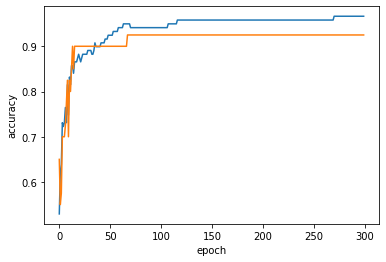

0.957983193277311
0.925
0.9495798319327731
0.925


In [13]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))

sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

sc=SGDClassifier(loss='log', max_iter =100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc=SGDClassifier(loss='hinge', max_iter =100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


#내용

## 내용 1

데이터가 추가될때마다 새로운 모델을 계속 만드는 방법

가중치와 절편을 유지하면서이터가 추가될때마다 새로운 모델을 계속 만드는 방법

이터가 추가될때마다 새로운 모델을 계속 만드는 방법

가중치와 절편을 유지하면서 새로운 데이터들을 업데이트하는 것 : 점진적인 학습


확률적 경사 하강법

랜덤 / 기울기 / 내려가기

무작위하게 가파른 경사를 내려가는 것(조금씩) 최저점(최적점)에 내려가야 하는데 건너뛰는 것을 주의
=훈련

훈련 세트를 전부 1회 사용하는것 = 1에포크 완료
에포크를 여러 번 반복하는 것

 
확률적 경사하강법(훈련 세트를 한 개씩) \\
미니배치 경사 하강법(여러 개씩 사용)






손실 함수

나쁜 정도를 측정하는 함수(값이 낮을수록 좋다)

분류

분류 문제에서는 정확도를 많이 체크한다.
이진분류의 경우에는 정확도가 0.5 /0.75.. 등인데 이는 연속적이지 않기때문에 손실함수로 사용할 수 없다

미분가능한함수만 손실함수를 사용할 수 있다.

분류에서는 정확도로 성능을 체크하고 \\
로지스틱 손실 함수를 통해서 최적화를 한다(정확도로 손실함수 불가능)



회귀

평균 절댓값 오차 ,평균 제곱 오차 는 미분가능하므로 손실함수 사용가능

손실함수 = 측정지표 : 손실함수를 통해서 성능 확인 및 최적화

로지스틱 손실 함수

$손실 : -예측*정답$ \\
타깃(정답)이 0인경우는 곱할 수 없으므로 \\
$손실 : (1-예측)*1$ \\

로그값으로 하면 더 좋 다.
(타깃값과 멀어질수록 값이 커지기 때문에) \\
$ -log(예측 확률)$ \\
$-log(1-예측 확률)$



## 내용 2 데이터 전처리

In [13]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) 

가장 가파른 경사를 내려가기 위해서는 각각의 특성마다 스케일이 같아야 한다.

스케일이 다르면 경사를 공평하게 예측할 수 없다.

StandardScaler 평균 / 표준편차를 계산한 후

훈련 세트와 테스트 세트를 바꾼다(fit).

## 내용 3 SGDClassifier

SGDClassifier : 확률적 경사 하강법의 분류 알고리즘

배치나 미니배치는 지원하지 않는다.
한개씩 꺼내 씀GDClassifier : 확률적 경사 하강법의 분류 알고리즘

배치나 미니배치는 지원하지 않는다.
한개씩 꺼내 씀


SGDRegressor :  확률적 경사 하강법의 회귀 알고리즘


SGDRegressor :  확률적 경사 하강법의 회귀 알고리즘

In [14]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

# 정확도
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))
# 77퍼 정도가 나옴rom sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

# 정확도
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled, test_target))
# 77퍼 정도가 나옴

# 정확도 향상
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775
0.8151260504201681
0.825


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


loss='log' : 로지스틱 손실 함수 지정
로지스틱 회귀 모델(분류임) 훈련

머신러닝 모델이 아니라 머신러닝 모델을 최적화하는 방법이기 때문에 위와 같이 지정을 해주어야 한다.

max_iter : 10 (에포크와 동일)

fit : 기존의 w,b(기울기,절편)을 버리고 학습

partial_fit : 기존의 w,b를 유지한 체 학습

## 내용 4 에포크와 과대 / 과소적합

이전 내용

규제가 낮아지면 훈련 세트에 과대적합되고 테스트 세트의 점수가 낮아진다.

규제가 커지면 훈련 / 테스트세트의 점수가 낮아짐

에포크가 많아지면 훈련 세트에는 잘 맞지만  어느 순간부터 테스트 세트의 점수는 떨어진다.(과대적합)

에포크가 적으면 과소적합 (둘 다 낮음)

적절한 부분에서 멈추는 것 : 조기 종료

## 내용 5 조기 종료

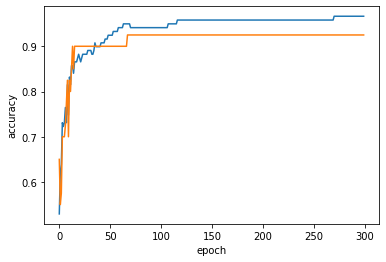

0.957983193277311
0.925
0.9495798319327731
0.925


In [15]:
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#에포크를 100회정도로 지정하여 정확도 상승
#로지스틱 회귀 모델(log)사용
sc=SGDClassifier(loss='log', max_iter =100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#hinge 사용
sc=SGDClassifier(loss='hinge', max_iter =100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

sc.partial_fit(train_scaled, train_target, classes=classes)

partial_fit메소드 에서 클래스 매개변수를 사용하는 데 그 이유

partial_fit메소드는 훈련 세트에 일부분만 사용할 수 있다고 가정한다.

이전에 fit메소드를 사용하지 않으면 전체 셈플에 클래스의 개수(목록)를 알 수 없는 상황이 올 수 있기 때문에 classes의 개수를 알려주어야 한다.

fit메소드를 쓰면 할 필요 없음

그래프를 보면서 자원이 적게 소모되는(가능한 한 빠른) 구간만큼 에포크 해준다.

# 내용 6

classes는 타깃 값과 똑같은 타입으로 전달하면 된다. 위에서는 문자열lasses는 타깃 값과 똑같은 타입으로 전달하면 된다. 위에서는 문자열

분류 : 여러가지 개수 중 하나 선택

회귀 : 임의의 실수값이 나오는 것들



